In [347]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [348]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.filterwarnings('ignore')

In [349]:
df = pd.read_csv("new.csv")

In [350]:
df = df.drop(['State'], axis = 1) 

In [351]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.20000
1,Africa,Algeria,Algiers,1,2,1995,49.40000
2,Africa,Algeria,Algiers,1,3,1995,48.80000
3,Africa,Algeria,Algiers,1,4,1995,46.40000
4,Africa,Algeria,Algiers,1,5,1995,47.90000


In [303]:
delhi = df[df["City"] == "Delhi"]
delhi.reset_index(inplace = True)
delhi.drop('index', axis = 1, inplace=True)
delhi.describe()  

,Month,Day,Year,AvgTemperature
count,9265.00000,9265.00000,9265.00000,9265.00000
mean,6.46908,15.71765,2007.18683,75.79886
std,3.45748,8.80195,7.32454,19.31898
min,1.00000,1.00000,1995.00000,-99.00000
25%,3.00000,8.00000,2001.00000,65.00000
50%,6.00000,16.00000,2007.00000,80.50000
75%,9.00000,23.00000,2014.00000,87.50000
max,12.00000,31.00000,2020.00000,103.70000


In [304]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
delhi["AvgTemperature"].replace(-99, np.mean(delhi["AvgTemperature"]), inplace = True)#Replacing outliers with mean
delhi["AvgTemperature"] = pd.DataFrame(imputer.fit_transform(delhi.loc[:, "AvgTemperature":]))

In [306]:
delhi.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Asia,India,Delhi,1,1,1995,50.70000
1,Asia,India,Delhi,1,2,1995,52.10000
2,Asia,India,Delhi,1,3,1995,53.80000
3,Asia,India,Delhi,1,4,1995,53.70000
4,Asia,India,Delhi,1,5,1995,54.50000


In [307]:
delhi['Date'] = pd.to_datetime(delhi[['Year','Month','Day']])

In [308]:
delhi = delhi.drop(['Region', 'Country', 'City','Month','Day'], axis = 1)

In [309]:
delhi.head()

,Year,AvgTemperature,Date
0,1995,50.70000,1995-01-01
1,1995,52.10000,1995-01-02
2,1995,53.80000,1995-01-03
3,1995,53.70000,1995-01-04
4,1995,54.50000,1995-01-05


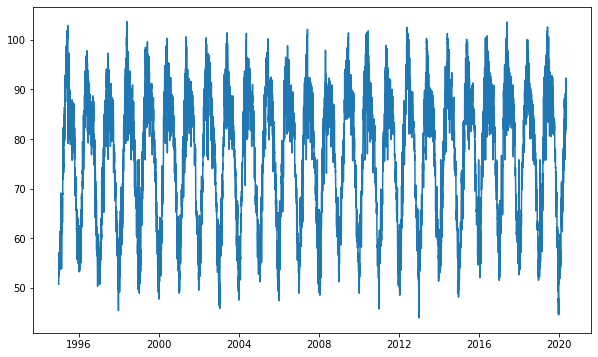

In [353]:
plt.plot(delhi["Date"], delhi["AvgTemperature"])

In [355]:
#Defining training and testing data
training_set = delhi[delhi["Year"] <= 2015]
test_set = delhi[delhi["Year"] > 2015]

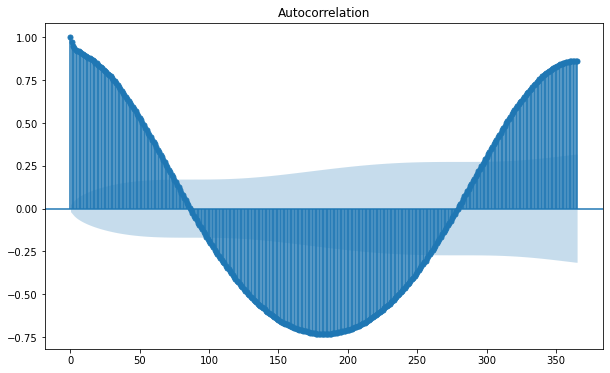

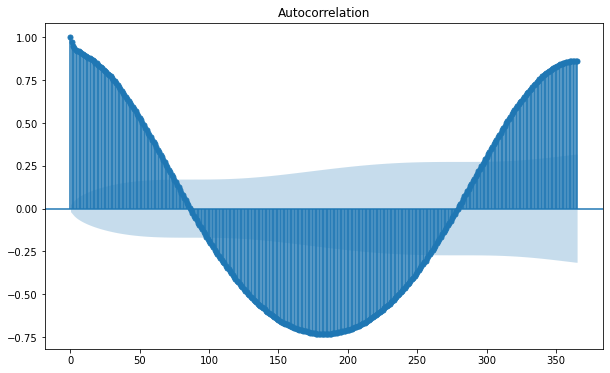

In [356]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(delhi["AvgTemperature"],lags=365)
#plt.show()

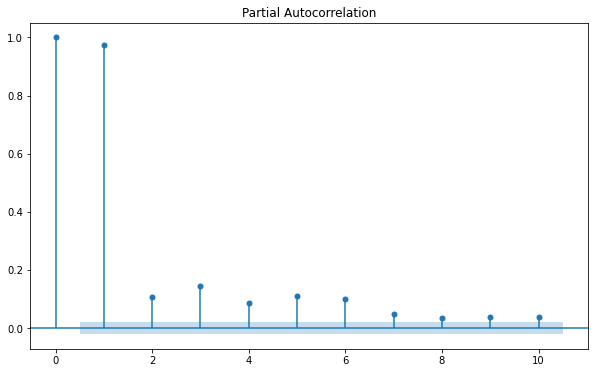

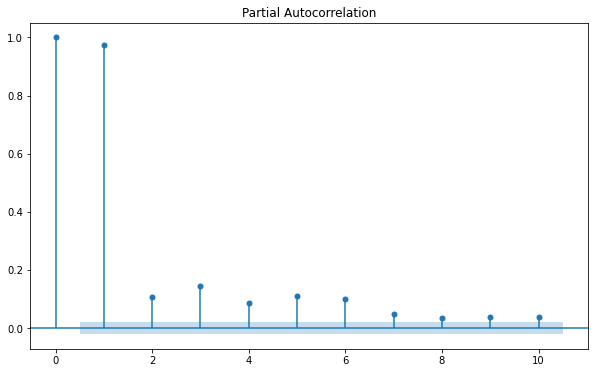

In [392]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(delhi["AvgTemperature"],lags=10)

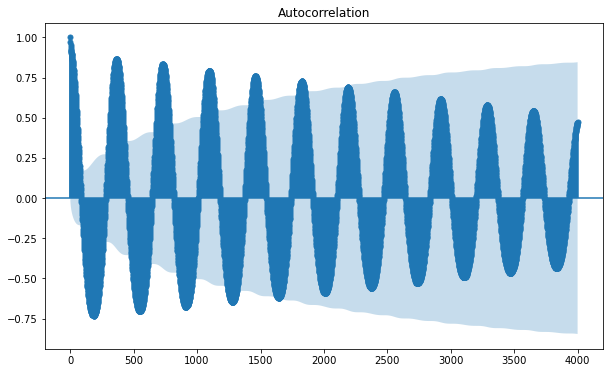

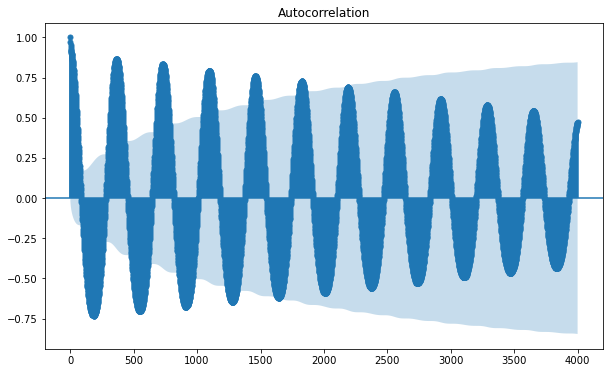

In [417]:
plot_acf(delhi["AvgTemperature"],lags= 4000)

In [413]:
from statsmodels.tsa.ar_model import AutoReg
model_AR = AutoReg(training_set["AvgTemperature"], lags = 1000)
model_fit_AR = model_AR.fit()
predictions_AR = model_fit_AR.predict(training_set.shape[0], training_set.shape[0] + test_set.shape[0] - 1)

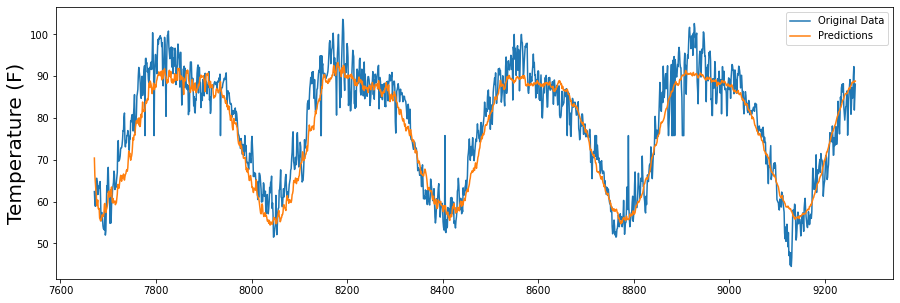

In [414]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.ylabel("Temperature (F)", fontsize = 20)
plt.plot(test_set["AvgTemperature"], label = "Original Data")
plt.plot(predictions_AR, label = "Predictions")
plt.legend()

In [415]:
#ROOT MEAN SQUARED ERROR

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions_AR,test_set["AvgTemperature"])
mse ** 0.5

4.888724679476645

In [381]:
from statsmodels.tsa.arima_model import ARMA
model_MA = ARMA(training_set["AvgTemperature"], order = (0, 2))
model_fit_MA = model_MA.fit()
predictions_MA = model_fit_MA.predict(test_set.index[0], test_set.index[-1])

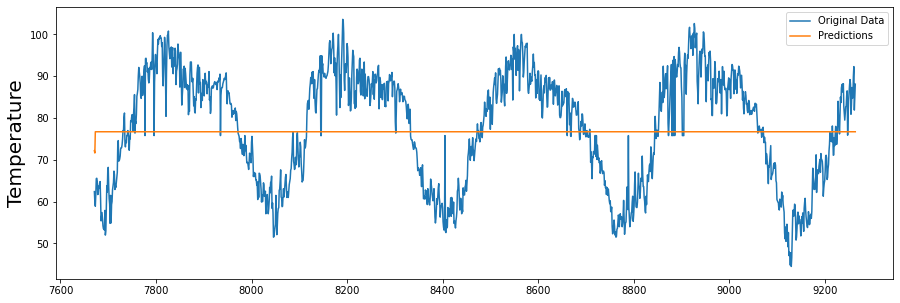

In [382]:
plt.figure(figsize = (15 , 5))
plt.ylabel("Temperature", fontsize = 20)
plt.plot(test_set["AvgTemperature"], label = "Original Data")
plt.plot(predictions_MA, label = "Predictions")
plt.legend()

In [383]:
mse = mean_squared_error(predictions_MA,test_set["AvgTemperature"])
mse ** 0.5

13.279782833077245